# Load the specparam values


In [67]:
import pandas as pd
import mne
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder_path = Path(
    "/Users/daniel/Projects/psd-paths/analysis/data/specparam/2024-05-14_specparam"
)  # replace with your folder path
df_list = []

# create a loop
for file_csv in folder_path.glob("*.csv"):
    # load csv file
    df = pd.read_csv(file_csv)
    # add dataframe to the list
    df_list.append(df)
# concatenate all DataFrames
df_all = pd.concat(df_list, ignore_index=True)
df_ap = df_all[["sub_id", "ch", "exponent",
                "offset", "r_squared"]].drop_duplicates()

display(df_ap)

,sub_id,ch,exponent,offset,r_squared
0,152,E1,2.624587,-6.464257,0.996982
1,152,E2,2.581382,-6.541432,0.997098
2,152,E3,2.476481,-6.791030,0.995207
3,152,E4,2.478057,-6.994996,0.998003
6,152,E5,2.300586,-7.816068,0.995685
...,...,...,...,...,...
23866,109,E220,0.804369,-9.769905,0.951381
23868,109,E221,0.704279,-9.878578,0.943059
23869,109,E222,0.680826,-9.948867,0.939876
23870,109,E223,0.701664,-9.973396,0.948624


# Load cognitive variables


In [39]:
cognit = pd.read_csv("DEMO_PROVA.csv", sep=";", decimal=",")
test_columns = [
    "SET-TOT",
    "TROG-T",
    "PYRAMIDS_PALMS",
    "PWB-TOT",
    "MMSE",
    "RET-IMMEDIATE",
    "RAVEN",
    "15-REY-WORD-IMMEDIATE",
    "DIGIT-SPAN-FORWARD",
    "ATTENTIVE-MATRICES",
]
cognit_10 = cognit[["sub_id"] + test_columns]
# Get the 'sub_id' values of the rows where all other values are NaN
nan_sub_ids = cognit_10.loc[cognit_10[test_columns].isna().all(
    axis=1), "sub_id"]

# Drop these rows
cognit_10 = cognit_10.drop(nan_sub_ids.index)

# Print the 'sub_id' values of the dropped rows
print(f"Dropped rows with 'sub_id': {nan_sub_ids.values}")
display(cognit_10)

Dropped rows with 'sub_id': [116]


,sub_id,SET-TOT,TROG-T,PYRAMIDS_PALMS,PWB-TOT,MMSE,RET-IMMEDIATE,RAVEN,15-REY-WORD-IMMEDIATE,DIGIT-SPAN-FORWARD,ATTENTIVE-MATRICES
0,101,16.0,3.0,52.0,194.0,29.0,28.0,32.0,41.0,5.0,20.0
1,102,13.0,4.0,52.0,160.0,26.0,32.0,34.0,57.0,5.0,56.0
2,103,17.0,4.0,51.0,NaN,28.0,26.0,27.0,41.0,6.0,34.0
3,104,18.0,4.0,52.0,196.0,30.0,35.0,35.0,63.0,6.0,48.0
4,105,14.0,2.0,51.0,162.0,29.0,36.0,29.0,47.0,6.0,32.0
5,106,12.0,2.0,52.0,171.0,26.0,21.0,21.0,42.0,5.0,28.0
6,107,17.0,2.0,51.0,NaN,29.0,NaN,28.0,17.0,4.0,43.0
7,108,16.0,1.0,47.0,154.0,29.0,17.0,27.0,22.0,4.0,37.0
8,109,17.0,2.0,52.0,231.0,30.0,32.0,33.0,37.0,6.0,46.0
9,110,17.0,4.0,52.0,208.0,29.0,28.0,22.0,28.0,6.0,41.0


# Merge dataframe and compute correlations


In [55]:
# Assume df_ap is your second DataFrame and it has a common column 'sub_id' with cognit_10
df = pd.merge(cognit_10, df_ap, on="sub_id")
# Calculate the correlation between 'exponent' and the specified columns, grouped by 'ch'
corr_df = df.groupby("ch")[["exponent"] + test_columns].corr()

# Extract the correlation values for 'exponent' and cognitive variables
corr_values = corr_df.loc[
    (corr_df.index.get_level_values(1) != "exponent"), "exponent"
].unstack()
corr_df = corr_values.reset_index().rename(columns={"index": "ch"})

# Get the unique 'ch' values in their original order
ch_order = df["ch"].unique()

# Reorder the rows based on the original order of 'ch'
corr_df["ch"] = pd.Categorical(
    corr_df["ch"], categories=ch_order, ordered=True)
corr_df = corr_df.sort_values("ch")

# Display the resulting DataFrame
display(corr_df)

,ch,SET-TOT,TROG-T,PYRAMIDS_PALMS,PWB-TOT,MMSE,RET-IMMEDIATE,RAVEN,15-REY-WORD-IMMEDIATE,DIGIT-SPAN-FORWARD,ATTENTIVE-MATRICES
0,E1,-0.153111,-0.041250,-0.125363,-0.185405,-0.176399,-0.118933,0.170028,-0.327919,-0.304732,-0.262614
102,E2,-0.047822,0.067539,-0.171335,-0.163134,0.055299,-0.031230,0.324929,-0.170192,-0.290786,-0.211606
132,E3,-0.114690,0.036609,-0.122025,-0.044375,-0.035070,-0.143890,0.178414,-0.128743,-0.305793,-0.192974
143,E4,-0.204653,-0.059763,-0.192190,-0.066402,-0.088376,-0.158840,0.131243,-0.158837,-0.438548,-0.183669
154,E5,-0.038499,0.053155,-0.274518,-0.113043,0.029373,-0.049739,0.177383,-0.201065,-0.306657,-0.015233
...,...,...,...,...,...,...,...,...,...,...,...
120,E220,-0.172082,-0.082066,-0.089864,-0.173567,-0.218709,-0.125286,0.197278,-0.356825,-0.336931,-0.271977
121,E221,-0.079224,-0.015073,-0.110325,-0.187198,-0.203975,-0.040858,0.253671,-0.343831,-0.268936,-0.223355
122,E222,0.020871,-0.040953,0.002692,-0.081252,-0.124622,0.102113,0.376733,-0.294728,-0.289763,-0.138256
123,E223,-0.006431,0.072117,-0.142731,-0.052678,-0.017040,-0.020680,0.207632,-0.189152,-0.236289,-0.121382


# Alternative approach - same results


In [37]:
import pandas as pd

# Assuming your data is stored in a DataFrame called 'df'

test_columns = [
    "SET-TOT",
    "TROG-T",
    "PYRAMIDS_PALMS",
    "PWB-TOT",
    "MMSE",
    "RET-IMMEDIATE",
    "RAVEN",
    "15-REY-WORD-IMMEDIATE",
    "DIGIT-SPAN-FORWARD",
    "ATTENTIVE-MATRICES",
]

# Select the 'ch', 'exponent', and test columns from the DataFrame
subset_df = df[["ch", "exponent"] + test_columns]

# Group the DataFrame by 'ch' and calculate the correlation matrix for each group
corr_dict = {}
for ch, group_df in subset_df.groupby("ch"):
    corr_matrix = group_df[["exponent"] + test_columns].corr()
    # Select the correlations with 'exponent'
    corr_dict[ch] = corr_matrix.iloc[0, 1:]

# Convert the dictionary of correlations into a DataFrame
corr_df = pd.DataFrame.from_dict(corr_dict, orient="index")

# Get the unique 'ch' values in their original order
ch_order = df["ch"].unique()

# Reorder the rows based on the original order of 'ch'
corr_df = corr_df.reindex(ch_order)

# Reset the index to have 'ch' as a regular column
corr_df = corr_df.reset_index().rename(columns={"index": "ch"})

# Display the resulting DataFrame
display(corr_df)

,ch,SET-TOT,TROG-T,PYRAMIDS_PALMS,PWB-TOT,MMSE,RET-IMMEDIATE,RAVEN,15-REY-WORD-IMMEDIATE,DIGIT-SPAN-FORWARD,ATTENTIVE-MATRICES
0,E1,-0.153111,-0.041250,-0.125363,-0.185405,-0.176399,-0.118933,0.170028,-0.327919,-0.304732,-0.262614
1,E2,-0.047822,0.067539,-0.171335,-0.163134,0.055299,-0.031230,0.324929,-0.170192,-0.290786,-0.211606
2,E3,-0.114690,0.036609,-0.122025,-0.044375,-0.035070,-0.143890,0.178414,-0.128743,-0.305793,-0.192974
3,E4,-0.204653,-0.059763,-0.192190,-0.066402,-0.088376,-0.158840,0.131243,-0.158837,-0.438548,-0.183669
4,E5,-0.038499,0.053155,-0.274518,-0.113043,0.029373,-0.049739,0.177383,-0.201065,-0.306657,-0.015233
...,...,...,...,...,...,...,...,...,...,...,...
199,E220,-0.172082,-0.082066,-0.089864,-0.173567,-0.218709,-0.125286,0.197278,-0.356825,-0.336931,-0.271977
200,E221,-0.079224,-0.015073,-0.110325,-0.187198,-0.203975,-0.040858,0.253671,-0.343831,-0.268936,-0.223355
201,E222,0.020871,-0.040953,0.002692,-0.081252,-0.124622,0.102113,0.376733,-0.294728,-0.289763,-0.138256
202,E223,-0.006431,0.072117,-0.142731,-0.052678,-0.017040,-0.020680,0.207632,-0.189152,-0.236289,-0.121382


# Prepare dummy data


In [60]:
bad_channels = [
    "E67",
    "E73",
    "E82",
    "E91",
    "E92",
    "E102",
    "E111",
    "E120",
    "E133",
    "E145",
    "E165",
    "E174",
    "E187",
    "E199",
    "E208",
    "E209",
    "E216",
    "E217",
    "E218",
    "E219",
    "E225",
    "E226",
    "E227",
    "E228",
    "E229",
    "E230",
    "E231",
    "E232",
    "E233",
    "E234",
    "E235",
    "E236",
    "E237",
    "E238",
    "E239",
    "E240",
    "E241",
    "E242",
    "E243",
    "E244",
    "E245",
    "E246",
    "E247",
    "E248",
    "E249",
    "E250",
    "E251",
    "E252",
    "E253",
    "E254",
    "E255",
    "E256",
]

# Create the montage
montage = mne.channels.make_standard_montage("GSN-HydroCel-256")
info = mne.create_info(montage.ch_names, sfreq=1000, ch_types="eeg")
evoked = mne.EvokedArray(np.random.random((len(montage.ch_names), 1000)), info)
evoked.set_montage(montage)
evoked.drop_channels(bad_channels)

Condition,
Data kind,average
Timepoints,1000 samples
Channels,204 channels
Number of averaged epochs,1
Time range (secs),0.0 – 0.999
Baseline (secs),off


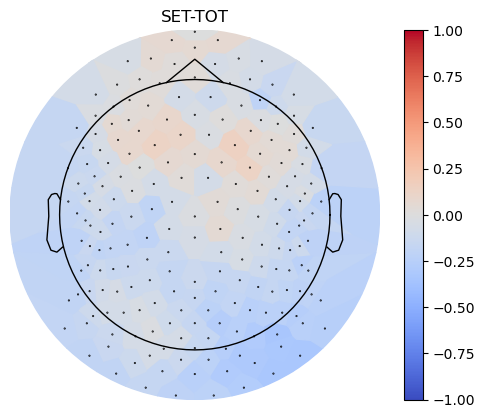

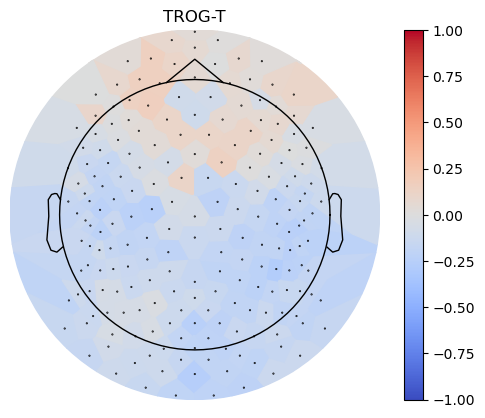

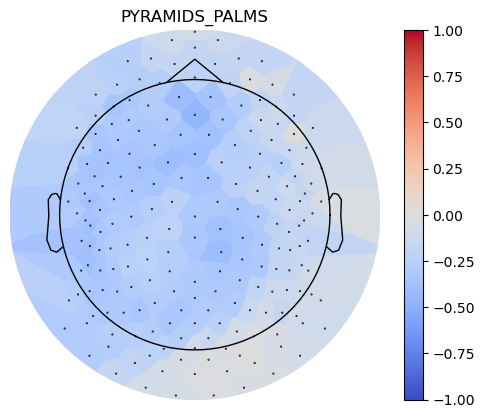

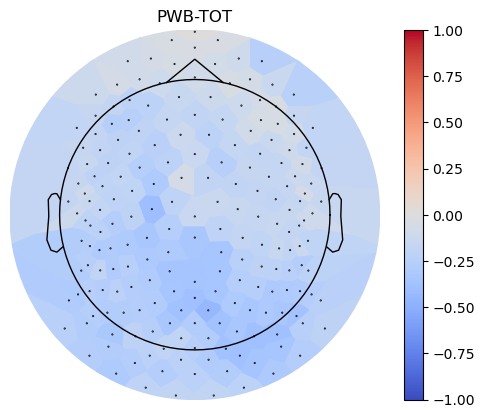

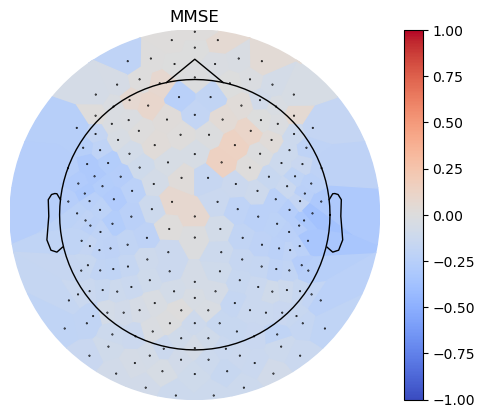

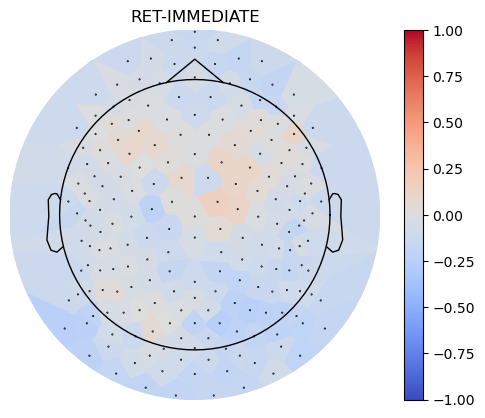

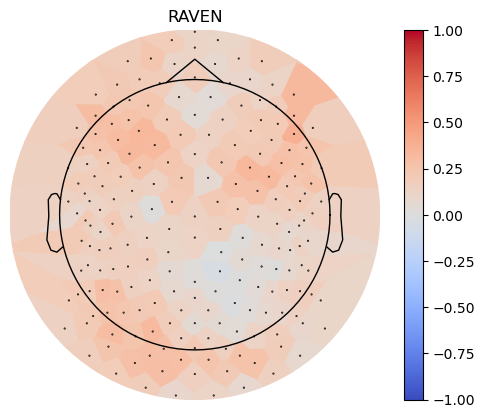

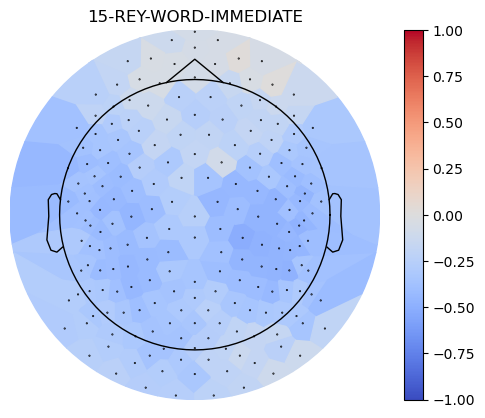

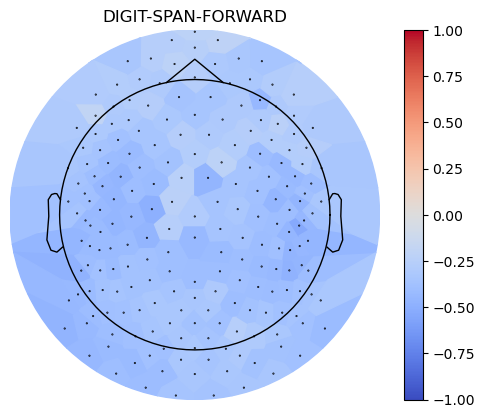

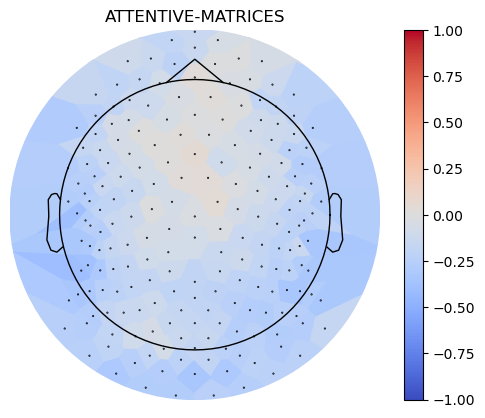

In [73]:
for column_name, column_data in corr_df.iloc[:, 1:].items():
    # plot the topomap of for the current test
    fig, axs = plt.subplots(1)
    im, _ = mne.viz.plot_topomap(
        column_data.values,
        evoked.info,
        axes=axs,
        cmap="coolwarm",
        contours=0,
        show=False,
        extrapolate="local",
        sphere=0.075,
        image_interp="nearest",
        vlim = (-1,1)

    )
    plt.title(column_name)
    cbar = plt.colorbar(im, ax=axs, orientation="vertical")
    plt.show()